In [ ]:
!pip install scikit-learn-extra

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 7.9 MB/s 


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from yellowbrick.cluster import KElbowVisualizer
from sklearn import datasets
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn_extra.cluster import KMedoids
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.manifold import TSNE

%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns

sns.set_style('dark')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# DATASET 1 (Density based clustering)


## Importing

In [ ]:
data1 = pd.read_csv("drive/MyDrive/Datasets/ndataset.csv")

In [ ]:
data1.drop(['Unnamed: 0'], axis=1, inplace=True)

In [ ]:
data1.head()

,Temperature,L,R,A_M,Type,Color_Blue,Color_Blue White,Color_Blue white,Color_Blue-White,Color_Blue-white,...,Color_white,Color_yellow-white,Color_yellowish,Spectral_Class_A,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O
0,0.029663,2.731275e-09,0.000083,0.876798,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.028980,4.944550e-10,0.000075,0.891807,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.017367,2.590003e-10,0.000048,0.957473,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.022622,1.412729e-10,0.000078,0.893371,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.000000,6.828189e-11,0.000049,1.000000,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
data1.describe()

,Temperature,L,R,A_M,Type,Color_Blue,Color_Blue White,Color_Blue white,Color_Blue-White,Color_Blue-white,...,Color_white,Color_yellow-white,Color_yellowish,Spectral_Class_A,Spectral_Class_B,Spectral_Class_F,Spectral_Class_G,Spectral_Class_K,Spectral_Class_M,Spectral_Class_O
count,240.000000,2.400000e+02,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,...,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000,240.000000
mean,0.224862,1.261901e-01,0.121709,0.509768,2.500000,0.233333,0.041667,0.016667,0.004167,0.108333,...,0.012500,0.033333,0.008333,0.079167,0.191667,0.070833,0.004167,0.025000,0.462500,0.166667
std,0.250977,2.112409e-01,0.265413,0.329347,1.711394,0.423836,0.200244,0.128287,0.064550,0.311450,...,0.111335,0.179881,0.091096,0.270563,0.394435,0.257082,0.064550,0.156451,0.499634,0.373457
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.036921,9.238657e-10,0.000048,0.177846,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.100812,8.290363e-08,0.000387,0.632677,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.344618,2.331591e-01,0.021936,0.801048,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000e+00,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
col = list(data1.columns)
col.remove('Type')

features = data1[col]
target = data1['Type']

## Visualizing

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 240 samples in 0.001s...
[t-SNE] Computed neighbors for 240 samples in 0.008s...
[t-SNE] Computed conditional probabilities for sample 240 / 240
[t-SNE] Mean sigma: 0.110627
[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.211807
[t-SNE] KL divergence after 300 iterations: 0.112701


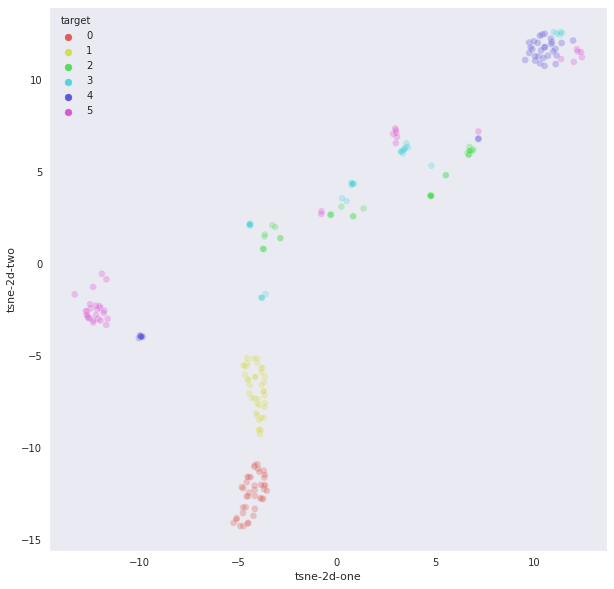

In [ ]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(features)

data = pd.DataFrame()
data['tsne-2d-one'] = tsne_results[:,0]
data['tsne-2d-two'] = tsne_results[:,1]
data['target'] = data1['Type']

plt.figure(figsize=(10,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="target",
    palette=sns.color_palette("hls", len(target.unique())),
    data=data,
    legend="full",
    alpha=0.3
)

## KMeans

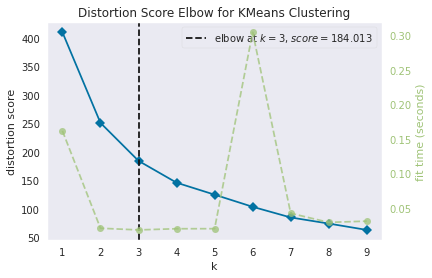

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(features)    # Fit the data to the visualizer
visualizer.poof() 

In [ ]:
N_CLUSTERS=3 # elbow at n_clusters=5
kmeans = KMeans(n_clusters=N_CLUSTERS) 
kmeans.fit(features)
centroids = kmeans.cluster_centers_

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 243 samples in 0.000s...
[t-SNE] Computed neighbors for 243 samples in 0.007s...
[t-SNE] Computed conditional probabilities for sample 243 / 243
[t-SNE] Mean sigma: 0.111109
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.890610
[t-SNE] KL divergence after 300 iterations: 0.119890


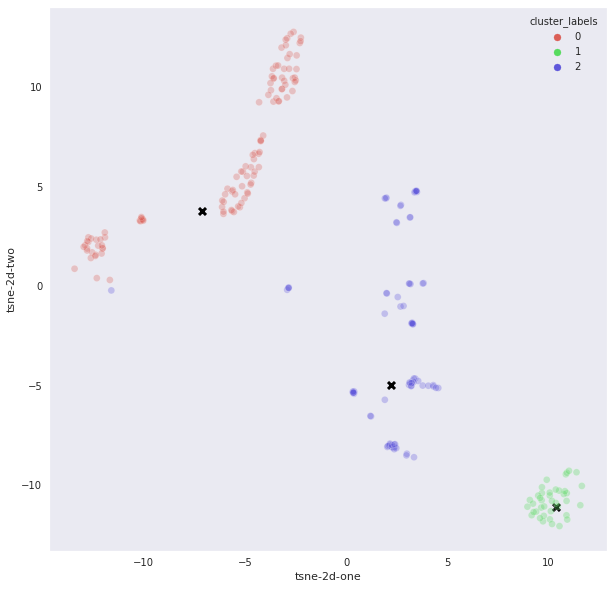

In [ ]:
temp = features.copy()
temp = temp.append(pd.DataFrame(centroids, columns=list(temp)), ignore_index=True)

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
temp = tsne.fit_transform(temp)
data = pd.DataFrame()

cluster_labels = kmeans.predict(features)

data["tsne-2d-one"] = temp[:len(features), 0]
data["tsne-2d-two"] = temp[:len(features), 1]
data['cluster_labels'] = cluster_labels

tsne_centroids = temp[len(features):, :]

plt.figure(figsize=(10,10))

plt.scatter(tsne_centroids[:, 0], tsne_centroids[:, 1], marker='x', c='black', linewidth='3')

sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="cluster_labels",
    palette=sns.color_palette("hls", N_CLUSTERS),
    data=data,
    legend="full",
    alpha=0.3
)

## KMedoids

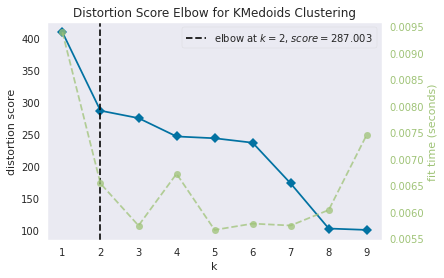

In [ ]:
model = KMedoids()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(features)    # Fit the data to the visualizer
visualizer.poof() 

In [ ]:
N_CLUSTERS = 2 # elbow at n_clusters=5

### KMedoids (manhattan)

In [ ]:
kmedoids_manhattan = KMedoids(metric="manhattan", n_clusters=N_CLUSTERS, method='pam')
kmedoids_manhattan.fit(features)
centroids = kmedoids_manhattan.cluster_centers_

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 242 samples in 0.000s...
[t-SNE] Computed neighbors for 242 samples in 0.010s...
[t-SNE] Computed conditional probabilities for sample 242 / 242
[t-SNE] Mean sigma: 0.109168
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.028862
[t-SNE] KL divergence after 300 iterations: 0.115590


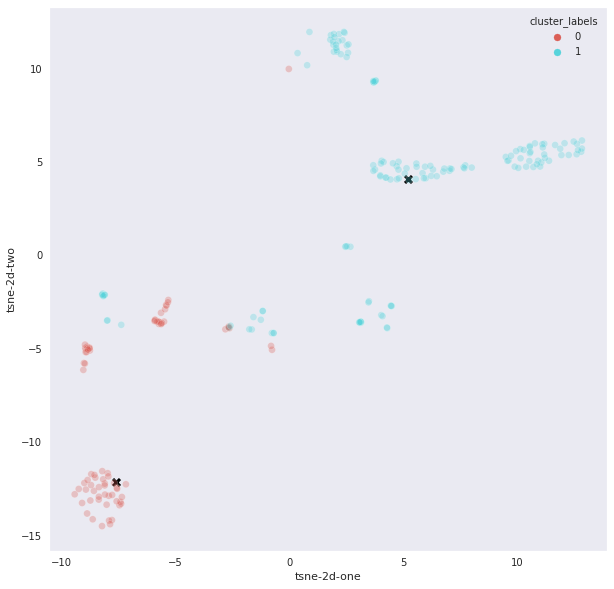

In [ ]:
temp = features.copy()
temp = temp.append(pd.DataFrame(centroids, columns=list(temp)), ignore_index=True)

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
temp = tsne.fit_transform(temp)
data = pd.DataFrame()

cluster_labels = kmedoids_manhattan.predict(features)

data["tsne-2d-one"] = temp[:len(features), 0]
data["tsne-2d-two"] = temp[:len(features), 1]
data['cluster_labels'] = cluster_labels

tsne_centroids = temp[len(features):, :]

plt.figure(figsize=(10,10))

plt.scatter(tsne_centroids[:, 0], tsne_centroids[:, 1], marker='x', c='black', linewidth='3')

sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="cluster_labels",
    palette=sns.color_palette("hls", N_CLUSTERS),
    data=data,
    legend="full",
    alpha=0.3
)

### KMedoids (euclidean)

In [ ]:
kmedoids_euclidean = KMedoids(metric="euclidean", n_clusters=N_CLUSTERS, method='pam')
kmedoids_euclidean.fit(features)
centroids = kmedoids_euclidean.cluster_centers_

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 242 samples in 0.000s...
[t-SNE] Computed neighbors for 242 samples in 0.009s...
[t-SNE] Computed conditional probabilities for sample 242 / 242
[t-SNE] Mean sigma: 0.108814
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.584312
[t-SNE] KL divergence after 300 iterations: 0.110209


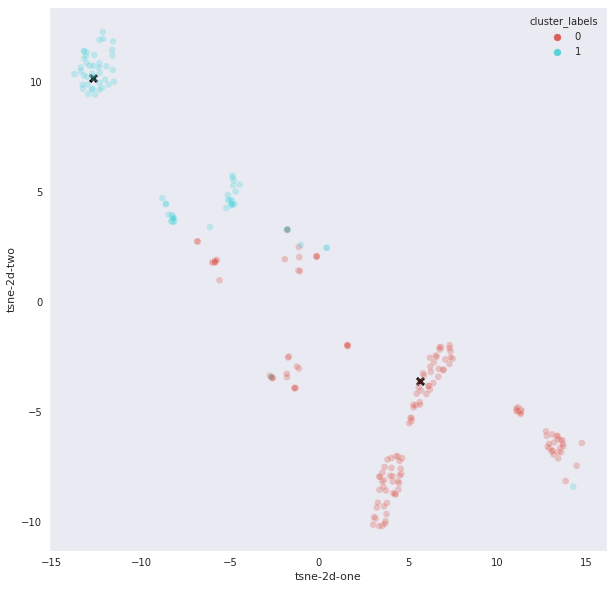

In [ ]:
temp = features.copy()
temp = temp.append(pd.DataFrame(centroids, columns=list(temp)), ignore_index=True)

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
temp = tsne.fit_transform(temp)
data = pd.DataFrame()

cluster_labels = kmedoids_euclidean.predict(features)

data["tsne-2d-one"] = temp[:len(features), 0]
data["tsne-2d-two"] = temp[:len(features), 1]
data['cluster_labels'] = cluster_labels

tsne_centroids = temp[len(features):, :]

plt.figure(figsize=(10,10))

plt.scatter(tsne_centroids[:, 0], tsne_centroids[:, 1], marker='x', c='black', linewidth='3')

sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="cluster_labels",
    palette=sns.color_palette("hls", N_CLUSTERS),
    data=data,
    legend="full",
    alpha=0.3
)

## Evaluation

### 1. Intrinsic Methods

#### Sum of Squared Errors

In [ ]:
# kmeans
kmeans.inertia_

184.01313098907184

In [ ]:
# kmedoids (manhattan)
kmedoids_manhattan.inertia_

448.9948536441062

In [ ]:
# kmedoids (euclidean)
kmedoids_euclidean.inertia_

225.65863802750005

#### Silhouette Coefficient

In [ ]:
# kmeans
cluster_labels = kmeans.predict(features)
silhouette_avg = metrics.silhouette_score(features, cluster_labels)
print(silhouette_avg)

0.5181769500958624


In [ ]:
# kmedoids (manhattan)
cluster_labels = kmedoids_manhattan.predict(features)
silhouette_avg = metrics.silhouette_score(features, cluster_labels, metric='manhattan')
print (silhouette_avg)

0.45423830228864454


In [ ]:
# kmedoids (euclidean)
cluster_labels = kmedoids_euclidean.predict(features)
silhouette_avg = metrics.silhouette_score(features, cluster_labels)
print (silhouette_avg)

0.3789367662156679


### 2. Extrinsic Methods

#### Purity

In [ ]:
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

In [ ]:
# kmeans
cluster_labels = kmeans.predict(features)
purity = purity_score(target, cluster_labels)
print (purity)

0.45416666666666666


In [ ]:
# kmedoids (manhattan)
cluster_labels = kmedoids_manhattan.predict(features)
purity = purity_score(target, cluster_labels)
print (purity)

0.29583333333333334


In [ ]:
# kmedoids (euclidean)
cluster_labels = kmedoids_euclidean.predict(features)
purity = purity_score(target, cluster_labels)
print (purity)

0.29583333333333334


#### Rand_index

In [ ]:
# kmeans
cluster_labels = kmeans.predict(features)
silhouette_avg = metrics.adjusted_rand_score(target, cluster_labels)
print (silhouette_avg)

0.3259273581787576


In [ ]:
# kmedoids (manhattan)
cluster_labels = kmedoids_manhattan.predict(features)
silhouette_avg = metrics.adjusted_rand_score(target, cluster_labels)
print (silhouette_avg)

0.09221376823108729


In [ ]:
# kmedoids (euclidean)
cluster_labels = kmedoids_euclidean.predict(features)
silhouette_avg = metrics.adjusted_rand_score(target, cluster_labels)
print (silhouette_avg)

0.10387833003488621


# DATASET 2 (Density based clustering)

## Importing

In [ ]:
data2 = pd.read_csv("drive/MyDrive/Datasets/dataset2.csv")

In [ ]:
data2.head()

,region,tenure,age,income,marital,address,ed,employ,retire,gender,reside,custcat
0,2,13,44,64,1,9,4,5,0,0,2,A
1,3,11,33,136,1,7,5,5,0,0,6,D
2,3,68,52,116,1,24,1,29,0,1,2,C
3,2,33,33,33,0,12,2,0,0,1,1,A
4,2,23,30,30,1,9,1,2,0,0,4,C


In [ ]:
data2.describe()

,region,tenure,age,income,marital,address,ed,employ,retire,gender,reside
count,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.0220,35.526000,41.684000,77.535000,0.495000,11.551000,2.671000,10.987000,0.047000,0.517000,2.331000
std,0.8162,21.359812,12.558816,107.044165,0.500225,10.086681,1.222397,10.082087,0.211745,0.499961,1.435793
min,1.0000,1.000000,18.000000,9.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,1.0000,17.000000,32.000000,29.000000,0.000000,3.000000,2.000000,3.000000,0.000000,0.000000,1.000000
50%,2.0000,34.000000,40.000000,47.000000,0.000000,9.000000,3.000000,8.000000,0.000000,1.000000,2.000000
75%,3.0000,54.000000,51.000000,83.000000,1.000000,18.000000,4.000000,17.000000,0.000000,1.000000,3.000000
max,3.0000,72.000000,77.000000,1668.000000,1.000000,55.000000,5.000000,47.000000,1.000000,1.000000,8.000000


In [ ]:
features = data2.iloc[:, 0:-1]
target = data2.iloc[:, -1]

## Visualizing

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.002s...
[t-SNE] Computed neighbors for 1000 samples in 0.073s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 9.189304
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.571938
[t-SNE] KL divergence after 300 iterations: 0.754639


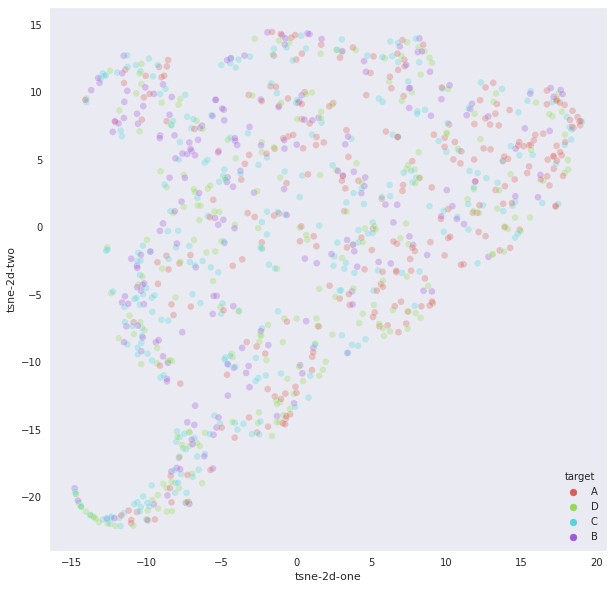

In [ ]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(features)

data = pd.DataFrame()
data['tsne-2d-one'] = tsne_results[:,0]
data['tsne-2d-two'] = tsne_results[:,1]
data['target'] = data2['custcat']

plt.figure(figsize=(10,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="target",
    palette=sns.color_palette("hls", len(target.unique())),
    data=data,
    legend="full",
    alpha=0.3
)

## KMeans

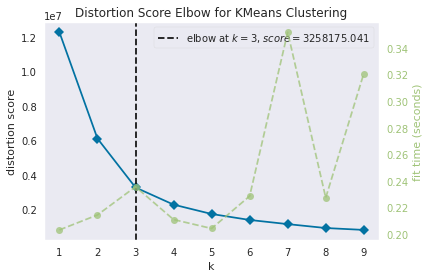

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(features)    # Fit the data to the visualizer
visualizer.poof() 

In [ ]:
N_CLUSTERS=3 # elbow at n_clusters=3

In [ ]:
kmeans = KMeans(n_clusters=N_CLUSTERS)
kmeans.fit(features)
centroids = kmeans.cluster_centers_

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1003 samples in 0.002s...
[t-SNE] Computed neighbors for 1003 samples in 0.055s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1003
[t-SNE] Computed conditional probabilities for sample 1003 / 1003
[t-SNE] Mean sigma: 9.189053
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.576111
[t-SNE] KL divergence after 300 iterations: 0.756115


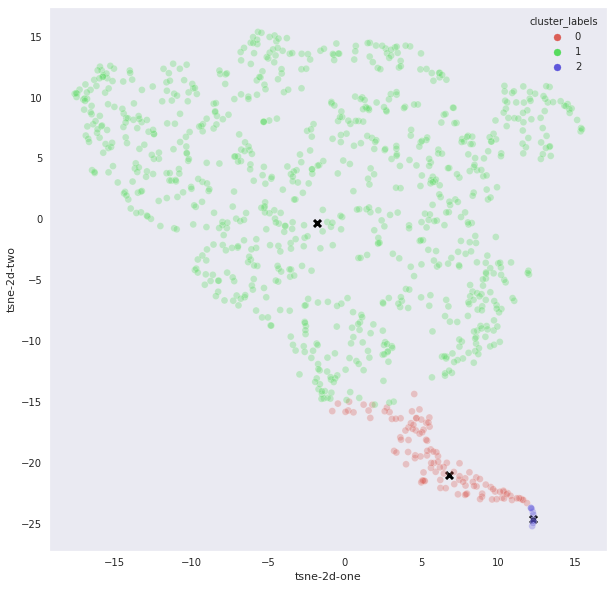

In [ ]:
temp = features.copy()
temp = temp.append(pd.DataFrame(centroids, columns=list(temp)), ignore_index=True)

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
temp = tsne.fit_transform(temp)
data = pd.DataFrame()

cluster_labels = kmeans.predict(features)

data["tsne-2d-one"] = temp[:len(features), 0]
data["tsne-2d-two"] = temp[:len(features), 1]
data['cluster_labels'] = cluster_labels

tsne_centroids = temp[len(features):, :]

plt.figure(figsize=(10,10))

plt.scatter(tsne_centroids[:, 0], tsne_centroids[:, 1], marker='x', c='black', linewidth='3')

sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="cluster_labels",
    palette=sns.color_palette("hls", N_CLUSTERS),
    data=data,
    legend="full",
    alpha=0.3
)

## KMedoids

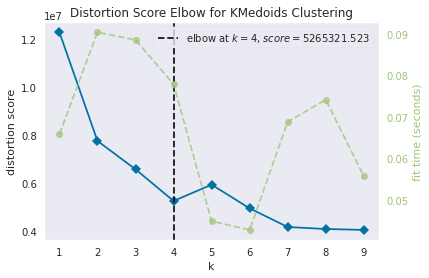

In [ ]:
model = KMedoids()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(features)    # Fit the data to the visualizer
visualizer.poof() 

In [ ]:
N_CLUSTERS = 4 # elbow at n_clusters=4

### KMedoids (manhattan)

In [ ]:
kmedoids_manhattan = KMedoids(metric="manhattan", n_clusters=N_CLUSTERS, method='pam')
kmedoids_manhattan.fit(features)
centroids = kmedoids_manhattan.cluster_centers_

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1004 samples in 0.003s...
[t-SNE] Computed neighbors for 1004 samples in 0.033s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1004
[t-SNE] Computed conditional probabilities for sample 1004 / 1004
[t-SNE] Mean sigma: 9.173637
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.588535
[t-SNE] KL divergence after 300 iterations: 0.755344


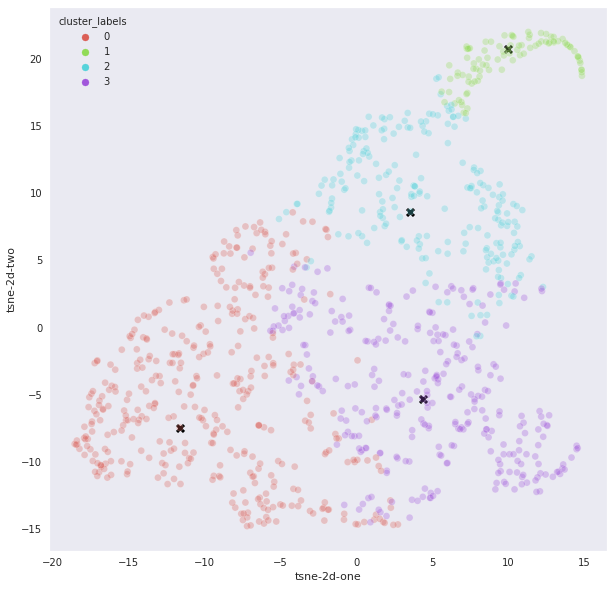

In [ ]:
temp = features.copy()
temp = temp.append(pd.DataFrame(centroids, columns=list(temp)), ignore_index=True)

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
temp = tsne.fit_transform(temp)
data = pd.DataFrame()

cluster_labels = kmedoids_manhattan.predict(features)

data["tsne-2d-one"] = temp[:len(features), 0]
data["tsne-2d-two"] = temp[:len(features), 1]
data['cluster_labels'] = cluster_labels

tsne_centroids = temp[len(features):, :]

plt.figure(figsize=(10,10))

plt.scatter(tsne_centroids[:, 0], tsne_centroids[:, 1], marker='x', c='black', linewidth='3')

sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="cluster_labels",
    palette=sns.color_palette("hls", N_CLUSTERS),
    data=data,
    legend="full",
    alpha=0.3
)

### KMedoids (euclidean)

In [ ]:
kmedoids_euclidean = KMedoids(metric="euclidean", n_clusters=N_CLUSTERS, method='pam')
kmedoids_euclidean.fit(features)
centroids = kmedoids_euclidean.cluster_centers_

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 1004 samples in 0.002s...
[t-SNE] Computed neighbors for 1004 samples in 0.031s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1004
[t-SNE] Computed conditional probabilities for sample 1004 / 1004
[t-SNE] Mean sigma: 9.183064
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.615074
[t-SNE] KL divergence after 300 iterations: 0.754565


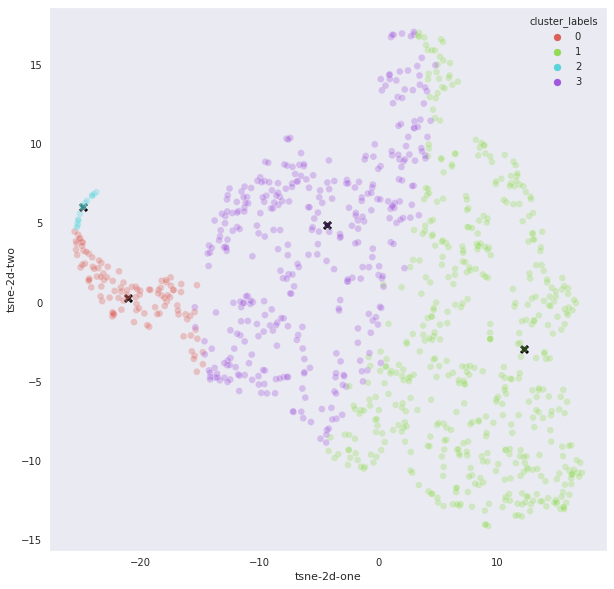

In [ ]:
temp = features.copy()
temp = temp.append(pd.DataFrame(centroids, columns=list(temp)), ignore_index=True)

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
temp = tsne.fit_transform(temp)
data = pd.DataFrame()

cluster_labels = kmedoids_euclidean.predict(features)

data["tsne-2d-one"] = temp[:len(features), 0]
data["tsne-2d-two"] = temp[:len(features), 1]
data['cluster_labels'] = cluster_labels

tsne_centroids = temp[len(features):, :]

plt.figure(figsize=(10,10))

plt.scatter(tsne_centroids[:, 0], tsne_centroids[:, 1], marker='x', c='black', linewidth='3')

sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="cluster_labels",
    palette=sns.color_palette("hls", N_CLUSTERS),
    data=data,
    legend="full",
    alpha=0.3
)

## Evaluation

### 1. Intrinsic Methods

#### Sum of Squared Errors

In [ ]:
# kmeans
kmeans.inertia_

3258175.040614787

In [ ]:
# kmedoids (manhattan)
kmedoids_manhattan.inertia_

60310.0

In [ ]:
# kmedoids (euclidean)
kmedoids_euclidean.inertia_

34925.05525736021

#### Silhouette Coefficient

In [ ]:
# kmeans
cluster_labels = kmeans.predict(features)
silhouette_avg = metrics.silhouette_score(features, cluster_labels)
print (silhouette_avg)

0.6704673250239235


In [ ]:
# kmedoids (manhattan)
cluster_labels = kmedoids_manhattan.predict(features)
silhouette_avg = metrics.silhouette_score(features, cluster_labels, metric='manhattan')
print (silhouette_avg)

0.2594732695593435


In [ ]:
# kmedoids (euclidean)
cluster_labels = kmedoids_euclidean.predict(features)
silhouette_avg = metrics.silhouette_score(features, cluster_labels)
print (silhouette_avg)

0.3534208547932674


### 2. Extrinsic Methods

#### Purity

In [ ]:
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

In [ ]:
# kmeans
cluster_labels = kmeans.predict(features)
purity = purity_score(target, cluster_labels)
print (purity)

0.295


In [ ]:
# kmedoids (manhattan)
cluster_labels = kmedoids_manhattan.predict(features)
purity = purity_score(target, cluster_labels)
print (purity)

0.348


In [ ]:
# kmedoids (euclidean)
cluster_labels = kmedoids_euclidean.predict(features)
purity = purity_score(target, cluster_labels)
print (purity)

0.338


#### Rand_index

In [ ]:
# kmeans
cluster_labels = kmeans.predict(features)
rand_index = metrics.adjusted_rand_score(target, cluster_labels)
print (rand_index)

0.0014302779705772583


In [ ]:
# kmedoids (manhattan)
cluster_labels = kmedoids_manhattan.predict(features)
rand_index = metrics.adjusted_rand_score(target, cluster_labels)
print (rand_index)

0.024408810395408372


In [ ]:
# kmedoids (euclidean)
cluster_labels = kmedoids_euclidean.predict(features)
rand_index = metrics.adjusted_rand_score(target, cluster_labels)
print (rand_index)

0.01963171106597961


# DATASET 3 (Prototype based clustering)

## Importing

In [ ]:
data3 = pd.read_csv("drive/MyDrive/Datasets/digits_data.csv")

In [ ]:
data3.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
0,0.0,2.0,15.0,13.0,1.0,0.0,0.0,0.0,0.0,13.0,...,0.0,0.0,3.0,16.0,14.0,8.0,8.0,7.0,0.0,2
1,0.0,0.0,2.0,10.0,10.0,11.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,14.0,16.0,13.0,0.0,0.0,9
2,0.0,0.0,4.0,11.0,14.0,4.0,0.0,0.0,0.0,5.0,...,0.0,0.0,0.0,2.0,15.0,16.0,15.0,4.0,0.0,8
3,0.0,0.0,0.0,0.0,13.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,16.0,10.0,0.0,6
4,0.0,0.0,0.0,2.0,16.0,16.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,12.0,15.0,4.0,0.0,1


In [ ]:
data3.describe()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,target
count,765.0,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,...,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000,765.000000
mean,0.0,0.317647,5.354248,11.969935,10.856209,4.213072,0.598693,0.030065,0.009150,2.347712,...,0.316340,0.001307,0.298039,5.563399,12.169935,13.402614,9.758170,3.698039,0.484967,6.081046
std,0.0,0.877147,4.932927,3.918059,4.644169,4.845015,2.147018,0.556151,0.130123,3.357322,...,1.098217,0.036155,0.923832,5.098785,3.928335,3.489700,5.352528,4.895137,1.939219,2.719663
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,11.000000,12.000000,6.000000,0.000000,0.000000,3.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,4.000000,13.000000,15.000000,11.000000,1.000000,0.000000,6.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,7.000000,0.000000,0.000000,0.000000,4.000000,...,0.000000,0.000000,0.000000,10.000000,15.000000,16.000000,15.000000,6.000000,0.000000,8.000000
max,0.0,6.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,10.000000,1.000000,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,9.000000


In [ ]:
features = data3.iloc[:, 0:-1]
target = data3.iloc[:, -1]

## Visualizing

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 765 samples in 0.000s...
[t-SNE] Computed neighbors for 765 samples in 0.039s...
[t-SNE] Computed conditional probabilities for sample 765 / 765
[t-SNE] Mean sigma: 13.092718
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.978241
[t-SNE] KL divergence after 300 iterations: 0.712544


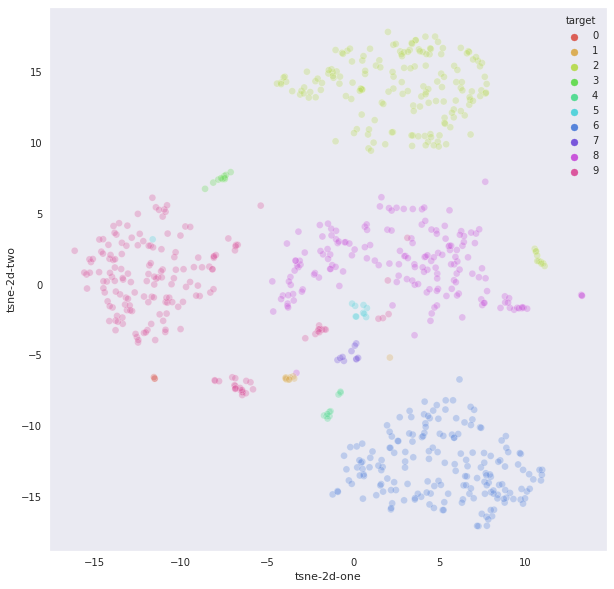

In [ ]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(features)

data = pd.DataFrame()
data['tsne-2d-one'] = tsne_results[:,0]
data['tsne-2d-two'] = tsne_results[:,1]
data['target'] = data3['target']

plt.figure(figsize=(10,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="target",
    palette=sns.color_palette("hls", len(target.unique())),
    data=data,
    legend="full",
    alpha=0.3
)

## KMeans

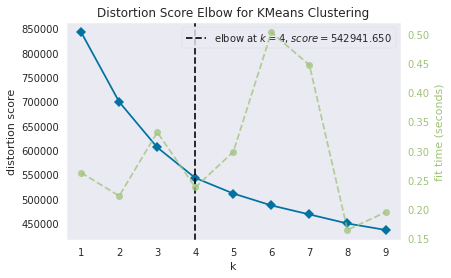

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(features)    # Fit the data to the visualizer
visualizer.poof() 

In [ ]:
N_CLUSTERS=4 # elbow at n_clusters=4
kmeans = KMeans(n_clusters=N_CLUSTERS)
kmeans.fit(features)
centroids = kmeans.cluster_centers_

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 769 samples in 0.001s...
[t-SNE] Computed neighbors for 769 samples in 0.043s...
[t-SNE] Computed conditional probabilities for sample 769 / 769
[t-SNE] Mean sigma: 12.969283
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.221699
[t-SNE] KL divergence after 300 iterations: 0.709114


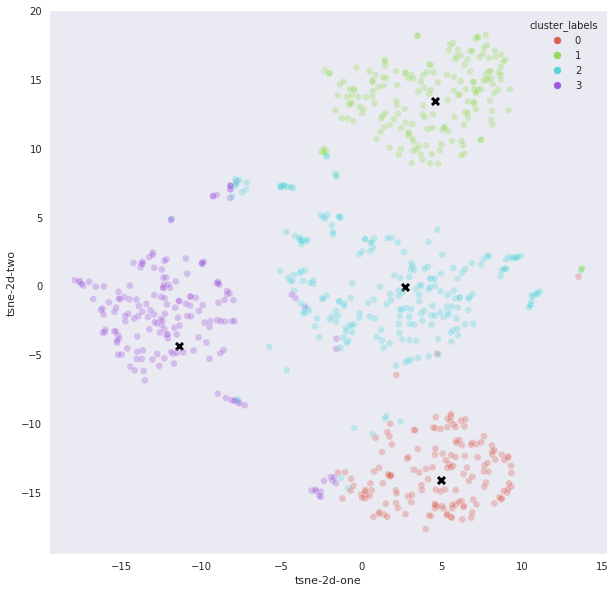

In [ ]:
temp = features.copy()
temp = temp.append(pd.DataFrame(centroids, columns=list(temp)), ignore_index=True)

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
temp = tsne.fit_transform(temp)
data = pd.DataFrame()

cluster_labels = kmeans.predict(features)

data["tsne-2d-one"] = temp[:len(features), 0]
data["tsne-2d-two"] = temp[:len(features), 1]
data['cluster_labels'] = cluster_labels

tsne_centroids = temp[len(features):, :]

plt.figure(figsize=(10,10))

plt.scatter(tsne_centroids[:, 0], tsne_centroids[:, 1], marker='x', c='black', linewidth='3')

sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="cluster_labels",
    palette=sns.color_palette("hls", N_CLUSTERS),
    data=data,
    legend="full",
    alpha=0.3
)

## KMedoids

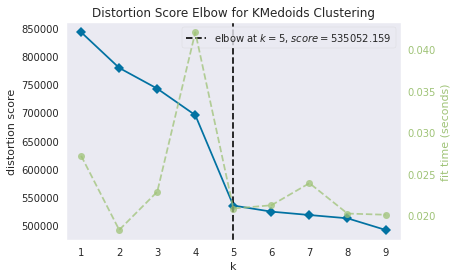

In [ ]:
model = KMedoids()
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(features)    # Fit the data to the visualizer
visualizer.poof() 

In [ ]:
N_CLUSTERS = 5 # elbow at n_clusters=4

### KMedoids (manhattan)

In [ ]:
kmedoids_manhattan = KMedoids(metric="manhattan", n_clusters=N_CLUSTERS, method='pam')
kmedoids_manhattan.fit(features)
centroids = kmedoids_manhattan.cluster_centers_

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 770 samples in 0.000s...
[t-SNE] Computed neighbors for 770 samples in 0.041s...
[t-SNE] Computed conditional probabilities for sample 770 / 770
[t-SNE] Mean sigma: 13.060417
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.199013
[t-SNE] KL divergence after 300 iterations: 0.712225


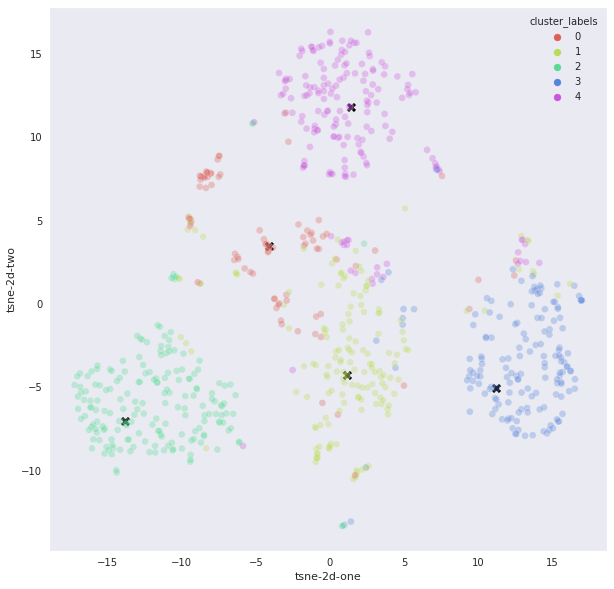

In [ ]:
temp = features.copy()
temp = temp.append(pd.DataFrame(centroids, columns=list(temp)), ignore_index=True)

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
temp = tsne.fit_transform(temp)
data = pd.DataFrame()

cluster_labels = kmedoids_manhattan.predict(features)

data["tsne-2d-one"] = temp[:len(features), 0]
data["tsne-2d-two"] = temp[:len(features), 1]
data['cluster_labels'] = cluster_labels

tsne_centroids = temp[len(features):, :]

plt.figure(figsize=(10,10))

plt.scatter(tsne_centroids[:, 0], tsne_centroids[:, 1], marker='x', c='black', linewidth='3')

sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="cluster_labels",
    palette=sns.color_palette("hls", N_CLUSTERS),
    data=data,
    legend="full",
    alpha=0.3
)

### KMedoids (euclidean)

In [ ]:
kmedoids_euclidean = KMedoids(metric="euclidean", n_clusters=N_CLUSTERS, method='pam')
kmedoids_euclidean.fit(features)
centroids = kmedoids_euclidean.cluster_centers_

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 770 samples in 0.000s...
[t-SNE] Computed neighbors for 770 samples in 0.037s...
[t-SNE] Computed conditional probabilities for sample 770 / 770
[t-SNE] Mean sigma: 13.055645
[t-SNE] KL divergence after 250 iterations with early exaggeration: 59.131912
[t-SNE] KL divergence after 300 iterations: 0.724927


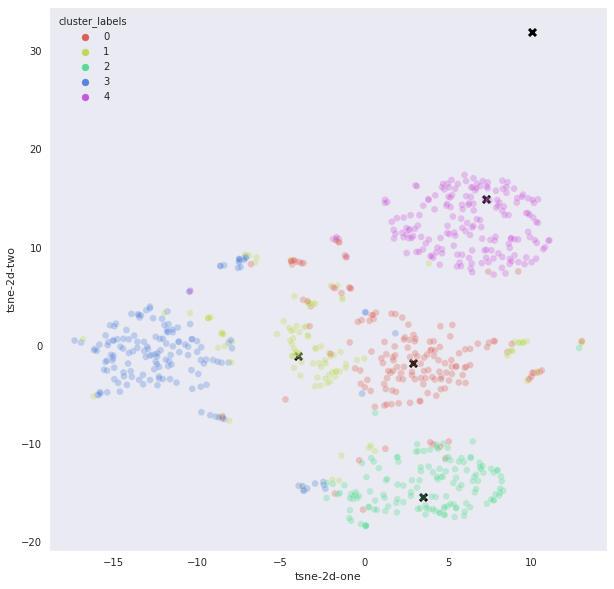

In [ ]:
temp = features.copy()
temp = temp.append(pd.DataFrame(centroids, columns=list(temp)), ignore_index=True)

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
temp = tsne.fit_transform(temp)
data = pd.DataFrame()

cluster_labels = kmedoids_euclidean.predict(features)

data["tsne-2d-one"] = temp[:len(features), 0]
data["tsne-2d-two"] = temp[:len(features), 1]
data['cluster_labels'] = cluster_labels

tsne_centroids = temp[len(features):, :]

plt.figure(figsize=(10,10))

plt.scatter(tsne_centroids[:, 0], tsne_centroids[:, 1], marker='x', c='black', linewidth='3')

sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="cluster_labels",
    palette=sns.color_palette("hls", N_CLUSTERS),
    data=data,
    legend="full",
    alpha=0.3
)

In [ ]:
reduced_data = features

## Evaluation

### 1. Intrinsic Methods

#### Sum of Squared Errors

In [ ]:
# kmeans
kmeans.inertia_

542923.9391450146

In [ ]:
# kmedoids (manhattan)
kmedoids_manhattan.inertia_

104601.0

In [ ]:
# kmedoids (euclidean)
kmedoids_euclidean.inertia_

22394.95919600739

#### Silhouette Coefficient

In [ ]:
# kmeans
cluster_labels = kmeans.predict(reduced_data)
silhouette_avg = metrics.silhouette_score(features, cluster_labels)
print (silhouette_avg)

0.20398192504560156


In [ ]:
# kmedoids (manhattan)
cluster_labels = kmedoids_manhattan.predict(reduced_data)
silhouette_avg = metrics.silhouette_score(features, cluster_labels, metric='manhattan')
print (silhouette_avg)

0.22819639236551778


In [ ]:
# kmedoids (euclidean)
cluster_labels = kmedoids_euclidean.predict(reduced_data)
silhouette_avg = metrics.silhouette_score(features, cluster_labels)
print (silhouette_avg)

0.17873218115123857


### 2. Extrinsic Methods

#### Purity

In [ ]:
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

In [ ]:
# kmeans
cluster_labels = kmeans.predict(reduced_data)
purity = purity_score(target, cluster_labels)
print (purity)

0.8431372549019608


In [ ]:
# kmedoids (manhattan)
cluster_labels = kmedoids_manhattan.predict(reduced_data)
purity = purity_score(target, cluster_labels)
print (purity)

0.8130718954248366


In [ ]:
# kmedoids (euclidean)
cluster_labels = kmedoids_euclidean.predict(reduced_data)
purity = purity_score(target, cluster_labels)
print (purity)

0.8274509803921568


#### Rand_index

In [ ]:
# kmeans
cluster_labels = kmeans.predict(reduced_data)
silhouette_avg = metrics.adjusted_rand_score(target, cluster_labels)
print (silhouette_avg)

0.6890491811446796


In [ ]:
# kmedoids (manhattan)
cluster_labels = kmedoids_manhattan.predict(reduced_data)
silhouette_avg = metrics.adjusted_rand_score(target, cluster_labels)
print (silhouette_avg)

0.6413318241612036


In [ ]:
# kmedoids (euclidean)
cluster_labels = kmedoids_euclidean.predict(reduced_data)
silhouette_avg = metrics.adjusted_rand_score(target, cluster_labels)
print (silhouette_avg)

0.643324073799074


# Result Confirmation

In [ ]:
def random_data_metric(data, label):
  dft = data.copy()
  y = dft[label]
  x = len(set(data[label]))
  dft = dft.drop([data], axis=1)
  import random
  random_labels = [random.randrange(-1, 7) for x in range(0,len(y))]
  return metrics.silhouette_score(dft, random_labels)

## KMeans

In [ ]:
data1_random = data1.copy
x = len(set(data1[label]))

ValueError: ignored